#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [58]:
model = Sequential()

In [59]:
#卷積層1

In [60]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [61]:
#卷積層2與池化層2

In [62]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [63]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [64]:
model.add(Flatten())
# model.add(Dropout(rate=0.25))

In [65]:
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(rate=0.25))

In [66]:
model.add(Dense(10, activation='softmax'))

In [67]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 256)         295168    
__________

# 載入之前訓練的模型

In [68]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [69]:
# MSE
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
train_history_mse=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)   

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 24s 645us/step - loss: 0.0900 - acc: 0.0890 - val_loss: 0.0900 - val_acc: 0.0920
Epoch 2/12
37500/37500 [==============================] - 22s 600us/step - loss: 0.0900 - acc: 0.0903 - val_loss: 0.0900 - val_acc: 0.0948
Epoch 3/12
37500/37500 [==============================] - 23s 601us/step - loss: 0.0900 - acc: 0.0921 - val_loss: 0.0900 - val_acc: 0.0961
Epoch 4/12
37500/37500 [==============================] - 23s 604us/step - loss: 0.0900 - acc: 0.0942 - val_loss: 0.0900 - val_acc: 0.0963
Epoch 5/12
37500/37500 [==============================] - 23s 605us/step - loss: 0.0900 - acc: 0.0958 - val_loss: 0.0900 - val_acc: 0.0976
Epoch 6/12
37500/37500 [==============================] - 22s 599us/step - loss: 0.0900 - acc: 0.0966 - val_loss: 0.0900 - val_acc: 0.0984
Epoch 7/12
37500/37500 [==============================] - 22s 600us/step - loss: 0.0900 - acc: 0.0981 - val_loss: 0.

In [70]:
# binary _crossentropy
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history_bi=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)   

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 23s 623us/step - loss: 0.3244 - acc: 0.9000 - val_loss: 0.3242 - val_acc: 0.9000
Epoch 2/12
37500/37500 [==============================] - 23s 605us/step - loss: 0.3241 - acc: 0.9000 - val_loss: 0.3239 - val_acc: 0.9000
Epoch 3/12
37500/37500 [==============================] - 23s 605us/step - loss: 0.3238 - acc: 0.9000 - val_loss: 0.3235 - val_acc: 0.9000
Epoch 4/12
37500/37500 [==============================] - 23s 606us/step - loss: 0.3234 - acc: 0.9000 - val_loss: 0.3231 - val_acc: 0.9000
Epoch 5/12
37500/37500 [==============================] - 23s 605us/step - loss: 0.3229 - acc: 0.9000 - val_loss: 0.3226 - val_acc: 0.9000
Epoch 6/12
37500/37500 [==============================] - 23s 606us/step - loss: 0.3224 - acc: 0.9000 - val_loss: 0.3220 - val_acc: 0.9000
Epoch 7/12
37500/37500 [==============================] - 23s 605us/step - loss: 0.3217 - acc: 0.9000 - val_loss: 0.

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_history(train, test, type_name):
    plt.plot(train)
    plt.plot(test)
    plt.title('Train History')
    plt.ylabel(type_name) # Accuracy, loss
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

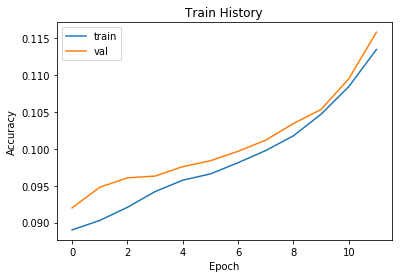

In [78]:
# MSE
show_history(train_history_mse.history['acc'],train_history_mse.history['val_acc'], 'Accuracy')

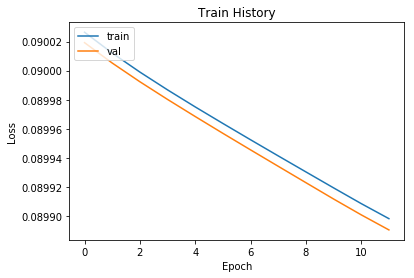

In [79]:
show_history(train_history_mse.history['loss'],train_history_mse.history['val_loss'], 'Loss')

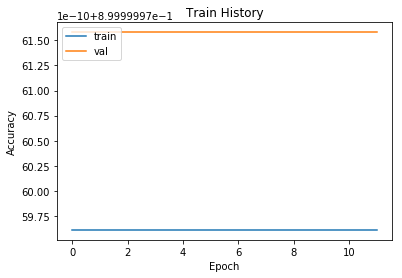

In [80]:
show_history(train_history_bi.history['acc'],train_history_bi.history['val_acc'], 'Accuracy')

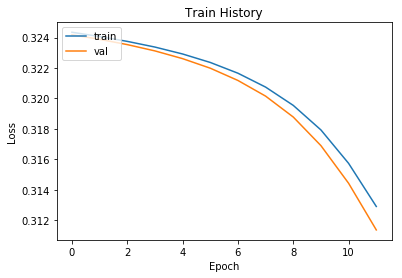

In [81]:
show_history(train_history_bi.history['loss'],train_history_bi.history['val_loss'], 'Loss')